In [2]:
C11 = 70.0136, -166.85755
C1 = 70.8357, -163.1044
C4 = 71.038916, -160.50353

from glob import glob
import numpy as np
from evFileProcessing import evFuncs # ev COM functions
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import urllib.request
import xarray as xr
import io
from tqdm.notebook import tqdm
def naive_fast(latvar,lonvar,lat0,lon0):
    # Read latitude and longitude from file into numpy arrays
    latvals = latvar[:]
    lonvals = lonvar[:]
    ny,nx = latvals.shape
    dist_sq = (latvals-lat0)**2 + (lonvals-lon0)**2
    minindex_flattened = dist_sq.argmin()  # 1D index of min element
    iy_min,ix_min = np.unravel_index(minindex_flattened, latvals.shape)
    return iy_min,ix_min

filesD1Y1 = glob('../data/2018/EVFiles/DAFT1/exports/Loaded*.csv')
filesD1Y2 = glob('../data/2019/EVFiles/DAFT1/exports/Loaded*.csv')
filesD2Y1 = glob('../data/2018/EVFiles/DAFT2/exports/Loaded*.csv')
filesD2Y2 = glob('../data/2019/EVFiles/DAFT2/exports/Loaded*.csv')
filesD3Y2 = glob('../data/2019/EVFiles/DAFT3/exports/Loaded*.csv')
dfD1 = evFuncs.evExports.readEvExports(filesD1Y1+filesD1Y2)
dfD1.name = 'D1'
dfD2 = evFuncs.evExports.readEvExports(filesD2Y1+filesD2Y2)
dfD2.name = 'D2'
dfD3 = evFuncs.evExports.readEvExports(filesD3Y2)
dfD3.name = 'D3'

In [3]:
import urllib.request
import xarray as xr
import io
url = 'ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/2017/seaice_conc_daily_nh_f17_20170801_v03r01.nc'
req = urllib.request.Request(url)
with urllib.request.urlopen(req) as resp:
    ds = xr.open_dataset(io.BytesIO(resp.read()))
ds

<xarray.Dataset>
Dimensions:                         (time: 1, xgrid: 304, ygrid: 448)
Coordinates:
  * time                            (time) datetime64[ns] 2017-08-01
  * ygrid                           (ygrid) float32 5.838e+06 ... -5.338e+06
  * xgrid                           (xgrid) float32 -3.838e+06 ... 3.738e+06
    latitude                        (ygrid, xgrid) float64 ...
    longitude                       (ygrid, xgrid) float64 ...
Data variables:
    projection                      |S1 ...
    seaice_conc_cdr                 (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_cdr        (time, ygrid, xgrid) float32 ...
    melt_onset_day_seaice_conc_cdr  (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_cdr           (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc      (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc          (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc          (time, ygrid, xgrid) float32 ...
Attributes:
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    program:                   NOAA Climate Data Record Program
    cdr_variable:              seaice_conc_cdr
    software_version_id:       git@bitbucket.org:nsidc/seaice_cdr.git@37f2e43...
    Metadata_Link:             https://nsidc.org/api/dataset/metadata/v2/oai?...
    product_version:           v03r01
    spatial_resolution:        25km
    standard_name_vocabulary:  CF Standard Name Table (v16, 11 October 2010)
    id:                        G02202
    naming_authority:          nsidc.org
    license:                   No constraints on data access or use
    summary:                   This data set provides a passive microwave sea...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SEA ICE > SEA ICE...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Key...
    cdm_data_type:             Grid
    project:                   NOAA/NSIDC passive microwave sea ice concentra...
    creator_url:               http://nsidc.org/
    creator_email:             nsidc@nsidc.org
    institution:               NSIDC > National Snow and Ice Data Center
    processing_level:          NOAA Level 3
    geospatial_lat_min:        [31.35]
    geospatial_lat_max:        [90.]
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        [-180.]
    geospatial_lon_max:        [180.]
    geospatial_lon_units:      degrees_east
    time_coverage_duration:    P1D
    time_coverage_resolution:  P1D
    contributor_name:          Walt Meier, Ruth Duerr, Florence Fetterer, Jul...
    contributor_role:          PrincipalInvestigator,author,author,author,aut...
    acknowledgment:            This project was supported in part by a grant ...
    source:                    ftp://sidads.colorado.edu/DATASETS/nsidc0001_p...
    history:                   seaice_conc_daily_nh_f17_20170801_v03r01.nc cr...
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2018-10-01T18:41:06Z
    time_coverage_start:       2017-08-01T00:00:00Z
    time_coverage_end:         2017-08-01T23:59:59Z
    comment:                   none

In [35]:
# Get the x,y for each mooring
url = 'ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/2017/seaice_conc_daily_nh_f17_20170801_v03r01.nc'
req = urllib.request.Request(url)
with urllib.request.urlopen(req) as resp:
    ds = xr.open_dataset(io.BytesIO(resp.read()))
iyC11,ixC11 = naive_fast(ds.latitude, ds.longitude, C11[0], C11[1])
iyC4,ixC4 = naive_fast(ds.latitude, ds.longitude, C4[0], C4[1])
iyC1,ixC1 = naive_fast(ds.latitude, ds.longitude, C1[0], C1[1])
ds.close()

In [44]:
# This is the function for the data requests
def buildNSIDCice(df, iy,ix,fnameOut=False):
    dates = df.datetime.map(lambda x: x.strftime('%Y%m%d')).astype(str).unique()
    iceC = []
    for date in tqdm(dates):
        url = 'ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/'+date[:4]+'/seaice_conc_daily_nh_f17_'+date+'_v03r01.nc'
        req = urllib.request.Request(url)
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(io.BytesIO(resp.read()))
        iceC.append(ds.seaice_conc_cdr[0,iy,ix].values)
        ds.close
    dfNew = pd.DataFrame({'datetime':dates,'iceC':iceC})
    if fnameOut==False:
        return dfNew
    else:
        dfNew.to_csv(fnameOut,index=False)
        return dfNew

In [ ]:
# Run the build
dfNew = buildNSIDCice(dfD3, iyC4, ixC4,'C4_NSIDC.csv')

In [58]:
dfIceC1 = pd.read_csv('../data/physicalData/C1_NSIDC.csv')
dfIceC4 = pd.read_csv('../data/physicalData/C4_NSIDC.csv')
dfIceC11 = pd.read_csv('../data/physicalData/C11_NSIDC.csv')

<AxesSubplot:>

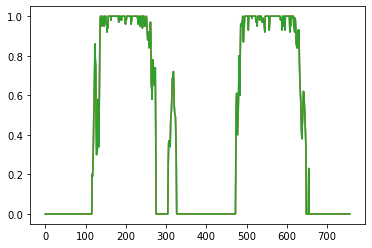

In [65]:
dfIceC1.iceC.plot()
dfIceC11.iceC.plot()
dfIceC4.iceC.plot()